In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-03-20 17:15:01.804338: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
spotify = pd.read_csv('./Data/Cleaned_SpotifyFeatures-Copy1.csv')
spotify.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,13,0.234,0.617,0.862,0.976000,0.1410,-12.855,1,0.0514,129.578,...,0,0,0,0,0,0,0,0,1,0
1,5,0.249,0.518,0.805,0.000000,0.3330,-6.248,1,0.0407,79.124,...,0,0,0,0,0,0,1,0,0,0
2,30,0.366,0.631,0.513,0.000004,0.1090,-6.376,1,0.0293,120.365,...,0,0,0,1,0,0,0,0,0,0
3,39,0.815,0.768,0.137,0.922000,0.1130,-13.284,0,0.0747,76.430,...,0,0,1,0,0,0,0,0,0,0
4,70,0.131,0.748,0.627,0.000000,0.0852,-6.029,1,0.0644,120.963,...,0,0,0,0,0,0,0,0,1,0


In [6]:
#Creating oridinal classifications for spotify popularity
spotify['popularity'] = np.where(spotify['popularity'] <= 33, 0, spotify['popularity']) 
spotify['popularity'] = np.where((spotify['popularity'] >= 34) & (spotify['popularity'] <= 66), 1, spotify['popularity']) 
spotify['popularity'] = np.where(spotify['popularity'] >= 67, 2, spotify['popularity']) 

spotify['popularity'].value_counts(normalize=True)

popularity
1    0.567331
0    0.393900
2    0.038769
Name: proportion, dtype: float64

In [49]:
#Assigning my X and y
X = spotify.drop('popularity', axis=1)
y = spotify['popularity']

#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#Scaling the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [50]:
X_train.shape

(143292, 49)

In [51]:
#Creating dnn1
col = X_train.shape[1]
dnn1 = Sequential()
dnn1.add(Dense(100, activation='relu', input_shape=(col,)))
dnn1.add(Dense(50, activation='relu'))
dnn1.add(Dense(5, activation='softmax'))

#Compiling Model
dnn1.compile(loss='crossentropy', optimizer='rmsprop', metrics=['acc'])

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
#Fitting the model
hist1 = dnn1.fit(
    X_train_sc, y_train,
    validation_data=(X_test_sc, y_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - acc: 0.7741 - loss: 0.4723 - val_acc: 0.7917 - val_loss: 0.4236
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.7896 - loss: 0.4286 - val_acc: 0.7924 - val_loss: 0.4254
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - acc: 0.7895 - loss: 0.4281 - val_acc: 0.7915 - val_loss: 0.4285
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - acc: 0.7920 - loss: 0.4263 - val_acc: 0.7919 - val_loss: 0.4255
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.7921 - loss: 0.4291 - val_acc: 0.7921 - val_loss: 0.4390
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.7909 - loss: 0.4333 - val_acc: 0.7911 - val_loss: 0.4295
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.7967 - loss: 0.4260 - val_acc: 0.7911 - val_loss: 0.4247
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - acc: 0.7925 - loss: 0.4326 - val_acc: 0.7906 - val_loss: 0.4291
Epoch 9/10
4478/4478 ━━━━━━━━━━━━━━━━━━━

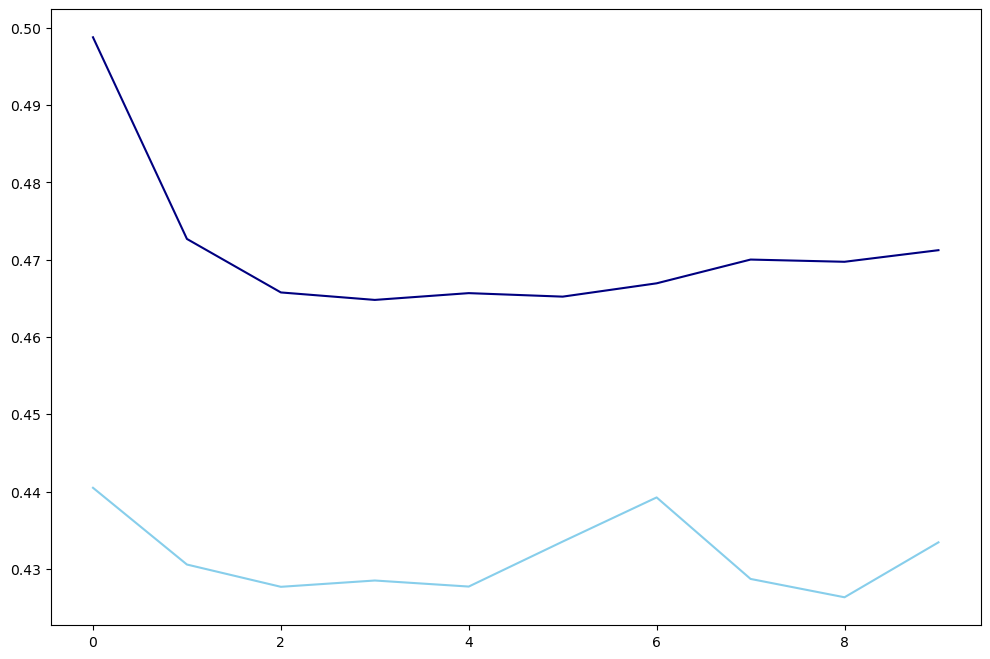

In [65]:
train_loss1 = hist.history['loss']
test_loss1 = hist.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss1, label='Training loss', color='navy')
plt.plot(test_loss1, label='Testing loss', color='skyblue')

In [61]:
#Creating dnn2
col = X_train.shape[1]
dnn2 = Sequential()
dnn2.add(Dense(80, activation='relu', input_shape=(col,)))
dnn2.add(Dropout(0.5))
dnn2.add(Dense(30, activation='relu'))
dnn2.add(Dropout(0.5))
dnn2.add(Dense(15, activation='relu'))
dnn2.add(Dropout(0.5))
dnn2.add(Dense(5, activation='softmax'))

#Compiling dnn2
dnn2.compile(loss='crossentropy', optimizer='rmsprop', metrics=['acc'])

#Fitting the model
hist2 = dnn2.fit(
    X_train_sc, y_train,
    validation_data=(X_test_sc, y_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.6777 - loss: 0.7394 - val_acc: 0.7839 - val_loss: 0.4629
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.7674 - loss: 0.5360 - val_acc: 0.7891 - val_loss: 0.4615
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - acc: 0.7709 - loss: 0.5222 - val_acc: 0.7892 - val_loss: 0.4576
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.7713 - loss: 0.5205 - val_acc: 0.7885 - val_loss: 0.4604
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7704 - loss: 0.5201 - val_acc: 0.7870 - val_loss: 0.4487
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - acc: 0.7775 - loss: 0.5165 - val_acc: 0.7897 - val_loss: 0.4673
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.7778 - loss: 0.5156 - val_acc: 0.7857 - val_loss: 0.4480
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.7784 - loss: 0.5141 - val_acc: 0.7877 - val_loss: 0.4487
Epoch 9/10
4478/4478 ━━━━━━━━━━━━━━━━━━━

In [57]:
#Importing l2
from tensorflow.keras.regularizers import l2

In [62]:
#Creating dnn3
col = X_train.shape[1]
dnn3 = Sequential()
dnn3.add(Dense(100, activation='relu', input_shape=(col,), kernel_regularizer=l2(0.001)))
dnn3.add(Dropout(0.5))
dnn3.add(Dense(50, activation='relu', kernel_regularizer=l2(0.001)))
dnn3.add(Dropout(0.5))
dnn3.add(Dense(20, activation='relu', kernel_regularizer=l2(0.001)))
dnn3.add(Dropout(0.5))
dnn3.add(Dense(5, activation='softmax'))

#Compiling dnn2
dnn3.compile(loss='crossentropy', optimizer='adam', metrics=['acc'])

#Fitting the model
hist3 = dnn3.fit(
    X_train_sc, y_train,
    validation_data=(X_test_sc, y_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.6874 - loss: 0.7948 - val_acc: 0.7879 - val_loss: 0.4638
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.7801 - loss: 0.4978 - val_acc: 0.7886 - val_loss: 0.4473
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.7798 - loss: 0.4883 - val_acc: 0.7892 - val_loss: 0.4482
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7799 - loss: 0.4863 - val_acc: 0.7889 - val_loss: 0.4475
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.7807 - loss: 0.4838 - val_acc: 0.7882 - val_loss: 0.4469
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.7793 - loss: 0.4833 - val_acc: 0.7884 - val_loss: 0.4495
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.7814 - loss: 0.4822 - val_acc: 0.7868 - val_loss: 0.4485
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7798 - loss: 0.4812 - val_acc: 0.7885 - val_loss: 0.4457
Epoch 9/10
4478/4478 ━━━━━━━━━━━━━━━━━━

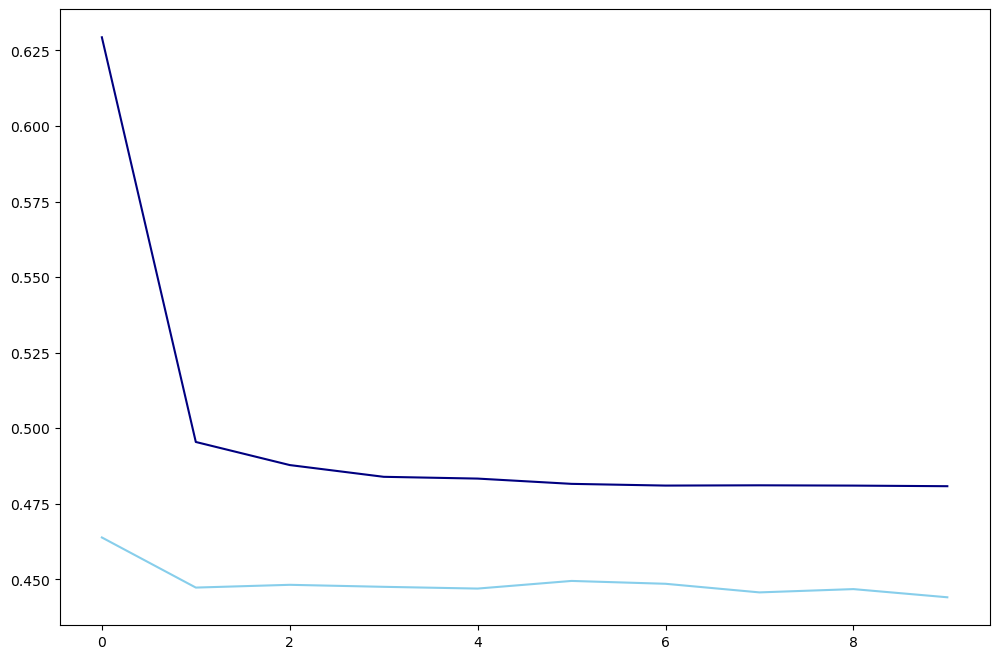

In [63]:
train_loss = hist3.history['loss']
test_loss = hist3.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')

In [7]:
#Assigning New X and y
X2 = spotify[['loudness', 'genre_Rap', 'genre_Rock', 'genre_Children\'s Music','genre_Pop', 'energy', 'danceability', 'time_signature', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'speechiness']]
y2 = spotify['popularity']

#Train test splitting
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=123)

#Scaling the data
sc = StandardScaler()
X2_train_sc = sc.fit_transform(X2_train)
X2_test_sc = sc.transform(X2_test)

In [9]:
#Creating dnn4
col2 = X2_train.shape[1]
dnn4 = Sequential()
dnn4.add(Dense(100, activation='relu', input_shape=(col2,)))
dnn4.add(Dropout(0.5))
dnn4.add(Dense(50, activation='relu'))
dnn4.add(Dropout(0.5))
dnn4.add(Dense(50, activation='relu'))
dnn4.add(Dropout(0.5))
dnn4.add(Dense(65, activation='relu'))
dnn4.add(Dropout(0.5))
dnn4.add(Dense(5, activation='softmax'))

#Compiling dnn2
dnn4.compile(loss='crossentropy', optimizer='adam', metrics=['acc'])

#Fitting the model
hist4 = dnn4.fit(
    X2_train_sc, y2_train,
    validation_data=(X2_test_sc, y2_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - acc: 0.6325 - loss: 0.7580 - val_acc: 0.6871 - val_loss: 0.6008
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.6868 - loss: 0.6234 - val_acc: 0.6988 - val_loss: 0.5947
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.6930 - loss: 0.6120 - val_acc: 0.7010 - val_loss: 0.5921
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.6931 - loss: 0.6098 - val_acc: 0.6887 - val_loss: 0.6122
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.6952 - loss: 0.6053 - val_acc: 0.6944 - val_loss: 0.5921
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.6973 - loss: 0.6041 - val_acc: 0.7040 - val_loss: 0.5873
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.6973 - loss: 0.6044 - val_acc: 0.7045 - val_loss: 0.5906
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.6988 - loss: 0.6058 - val_acc: 0.7059 - val_loss: 0.5845
Epoch 9/10
4478/4478 ━━━━━━━━━━━

In [68]:
spotify.columns

Index(['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'time_signature', 'valence', 'genre_A Capella',
       'genre_Alternative', 'genre_Anime', 'genre_Blues',
       'genre_Children's Music', 'genre_Children’s Music', 'genre_Classical',
       'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic',
       'genre_Folk', 'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz',
       'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap',
       'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska',
       'genre_Soul', 'genre_Soundtrack', 'genre_World', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#'],
      dtype='object')

In [3]:
spotify2 = pd.read_csv('../Data/Cleaned Data/Cleaned_SpotifyFeatures.csv')


spotify2['popularity'] = np.where(spotify2['popularity'] <= 20, 0, spotify2['popularity']) 
spotify2['popularity'] = np.where((spotify2['popularity'] >= 21) & (spotify2['popularity'] <= 40), 1, spotify2['popularity']) 
spotify2['popularity'] = np.where((spotify2['popularity'] >= 41) & (spotify2['popularity'] <= 60), 2, spotify2['popularity'])
spotify2['popularity'] = np.where((spotify2['popularity'] >= 61) & (spotify2['popularity'] <= 80), 3, spotify2['popularity'])
spotify2['popularity'] = np.where(spotify2['popularity'] >= 81, 4, spotify2['popularity']) 


spotify2.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,0,0.234,0.617,0.862,0.976000,0.1410,-12.855,1,0.0514,129.578,...,0,0,0,0,0,0,0,0,1,0
1,0,0.249,0.518,0.805,0.000000,0.3330,-6.248,1,0.0407,79.124,...,0,0,0,0,0,0,1,0,0,0
2,1,0.366,0.631,0.513,0.000004,0.1090,-6.376,1,0.0293,120.365,...,0,0,0,1,0,0,0,0,0,0
3,1,0.815,0.768,0.137,0.922000,0.1130,-13.284,0,0.0747,76.430,...,0,0,1,0,0,0,0,0,0,0
4,3,0.131,0.748,0.627,0.000000,0.0852,-6.029,1,0.0644,120.963,...,0,0,0,0,0,0,0,0,1,0


In [11]:
#Assigning New X and y
X3 = spotify2[['loudness', 'genre_Rap', 'genre_Rock', 'genre_Children\'s Music','genre_Pop', 'energy', 'danceability', 'time_signature', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'speechiness']]
y3 = spotify2['popularity']

#Train test splitting
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=123)

#Scaling the data
sc = StandardScaler()
X3_train_sc = sc.fit_transform(X3_train)
X3_test_sc = sc.transform(X3_test)

#Creating dnn4
col3 = X3_train.shape[1]
dnn5 = Sequential()
dnn5.add(Dense(100, activation='relu', input_shape=(col3,)))
dnn5.add(Dropout(0.5))
dnn5.add(Dense(50, activation='relu'))
dnn5.add(Dropout(0.5))
dnn5.add(Dense(50, activation='relu'))
dnn5.add(Dropout(0.5))
dnn5.add(Dense(65, activation='relu'))
dnn5.add(Dropout(0.5))
dnn5.add(Dense(5, activation='softmax'))

#Compiling dnn2
dnn5.compile(loss='crossentropy', optimizer='adam', metrics=['acc'])

#Fitting the model
hist5 = dnn5.fit(
    X3_train_sc, y3_train,
    validation_data=(X3_test_sc, y3_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10


/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4478/4478 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - acc: 0.4654 - loss: 1.1334 - val_acc: 0.5642 - val_loss: 0.9291
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.5544 - loss: 0.9613 - val_acc: 0.5658 - val_loss: 0.9279
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.5613 - loss: 0.9489 - val_acc: 0.5699 - val_loss: 0.9250
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - acc: 0.5639 - loss: 0.9465 - val_acc: 0.5574 - val_loss: 0.9290
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - acc: 0.5673 - loss: 0.9456 - val_acc: 0.5671 - val_loss: 0.9228
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.5669 - loss: 0.9453 - val_acc: 0.5760 - val_loss: 0.9213
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.5646 - loss: 0.9441 - val_acc: 0.5789 - val_loss: 0.9190
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.5681 - loss: 0.9403 - val_acc: 0.5771 - val_loss: 0.9143
Epoch 9/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10

In [12]:
#Creating X and y
X = spotify2.drop('popularity', axis=1)
y = spotify2['popularity']

#TTS on X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#Scaling, fitting, and transforming the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#Checking the shape of X_train 
X_train.shape

#Creating dnn1
col = X_train.shape[1]
dnn1 = Sequential()
dnn1.add(Dense(100, activation='relu', input_shape=(col,)))
dnn1.add(Dense(50, activation='relu'))
dnn1.add(Dense(5, activation='softmax'))

#Compiling Model
dnn1.compile(loss='crossentropy', optimizer='rmsprop', metrics=['acc'])

#Fitting the model
hist1 = dnn1.fit(
    X_train_sc, y_train,
    validation_data=(X_test_sc, y_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10


/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.7080 - loss: 0.7259 - val_acc: 0.7283 - val_loss: 0.6734
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7320 - loss: 0.6689 - val_acc: 0.7278 - val_loss: 0.6742
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7307 - loss: 0.6683 - val_acc: 0.7298 - val_loss: 0.6736
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.7292 - loss: 0.6725 - val_acc: 0.7252 - val_loss: 0.6927
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - acc: 0.7305 - loss: 0.6713 - val_acc: 0.7229 - val_loss: 0.6897
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7252 - loss: 0.6808 - val_acc: 0.7273 - val_loss: 0.6852
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7290 - loss: 0.6800 - val_acc: 0.7265 - val_loss: 0.7221
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.7292 - loss: 0.6839 - val_acc: 0.7273 - val_loss: 0.6948
Epoch 9/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/st